In [5]:
# 引入mnist
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784')

In [64]:
mnist.target = mnist.target.astype(np.int8)

In [65]:
np.unique(mnist['target'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=object)

In [66]:
x,y = mnist['data'],mnist['target']

In [67]:
import matplotlib
import matplotlib.pyplot as plt

In [68]:
y[3900]

7

In [69]:
digit = x[3900]

In [70]:
digit_image = digit.reshape(28,28)

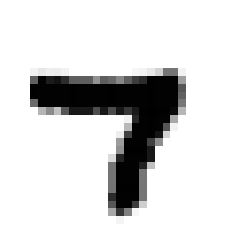

In [105]:
# 將彩色字白黑化
plt.imshow(digit_image,cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [106]:
x_train,x_test,y_train,y_test = x[:6000],x[6000:],y[:6000],y[6000:];#[開始（含）：到這之前（不含）]

In [107]:
shuffling_index = np.random.permutation(6000)

In [108]:
x_train,y_train = x[shuffling_index],y[shuffling_index]

In [109]:
y_train_6 = (y_train == 6)
y_test_6 = (y_train == 6)

In [110]:
# 使用sgd_classifier驗證對錯
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42, max_iter=1000)
sgd_classifier.fit(x_train,y_train_6)

SGDClassifier(random_state=42)

In [111]:
sgd_classifier.predict([digit])

array([False])

In [112]:
y[3900]

1

In [113]:
# 測試三次正確率
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier,x_train,y_train_6, cv = 3)

array([0.98 , 0.98 , 0.977])

In [115]:
#confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_classifier,x_train,y_train_6, cv = 3)
confusion_matrix(y_train_6,y_train_pred)

array([[5313,   79],
       [  47,  561]])